In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
kssr = pd.read_csv('./kssr/avgs.csv')

In [14]:
kssr.head()

,type,kex,leaf,int,root,cached_int,rtt,drop_rate,rate,measurements,...,server switched to ahs keys,server switched to ahs keys stdev,server emitted sf,server emitted sf stdev,server server encrypting traffic,server server encrypting traffic stdev,server server reading traffic,server server reading traffic stdev,server handshake completed,server handshake completed stdev
0,sign,kyber512,SphincsSha256128fSimple,SphincsSha256128fSimple,NaN,True,40.384,0,10mbit,20000,...,NaN,NaN,24126.424388,9979.237597,150.266100,592.168672,NaN,NaN,415265.433697,116399.522088
1,sign,kyber512,SphincsSha256128fSimple,SphincsSha256128fSimple,NaN,True,215.666,0,10mbit,20000,...,NaN,NaN,17253.822242,3815.544035,118.330851,59.239969,NaN,NaN,541319.208831,54429.025563
2,sign,kyber512,SphincsSha256128fSimple,SphincsSha256128fSimple,NaN,True,215.666,0,1000mbit,20000,...,NaN,NaN,17869.076690,3792.292919,137.963139,326.909175,NaN,NaN,432566.482002,25366.407161
3,sign,kyber512,SphincsSha256128fSimple,SphincsSha256128fSimple,NaN,True,37.900,0,10mbit,20000,...,NaN,NaN,23282.647271,9472.649368,136.744887,465.401458,NaN,NaN,417970.255607,115834.805565
4,sign,kyber512,SphincsSha256128fSimple,SphincsSha256128fSimple,NaN,True,209.126,0,1000mbit,20000,...,NaN,NaN,18112.021230,4232.921625,145.606764,451.982790,NaN,NaN,433203.052139,25249.962507


In [31]:
#TYPE,KEX,LEAF,INT,ROOT,RTT,RATE
alg_combos_rate = ['SKSSN37-10', 'SKSSN209-1000', 'SKSSN37-1000', 'SKSSN209-10', 'KKKSR209-10', 'KKKSR37-10', 'KKKSR209-1000', 'KKKSR37-1000','KKKSN209-10', 'KKKSN37-10', 'KKKSN209-1000', 'KKKSN37-1000', 'SKSSR209-1000','SKSSR37-1000','SKSSR37-10', 'SKSSR209-10']
# alg_combos = ['SKSFN206', 'SKSFN36', 'SKSFN36', 'SKSFN206', 'KKKFR36', 'KKKFR206', 'KKKFR206', 'KKKFR36','KKKFN36', 'KKKFN206', 'KKKFN206', 'KKKFN36', 'SKSFR206','SKSFR36','SKSFR206', 'SKSFR36']
kssr_filter['Algorithm'] = alg_combos_rate
len(alg_combos_rate)

16

In [41]:
kssr_filter = kssr.loc[(kssr['rtt'] == 37.900) | (kssr['rtt'] == kssr['rtt'][31])]
lat37rate10 = kssr.loc[(kssr_filter['rtt'] == 37.900) & (kssr_filter['rate'] == '10mbit')]
lat209rate10 = kssr.loc[(kssr_filter['rtt'] == kssr_filter['rtt'][4]) & (kssr_filter['rate'] == '10mbit')]
lat37rate1000 = kssr.loc[(kssr_filter['rtt'] == 37.900) & (kssr_filter['rate'] == '1000mbit')]
lat209rate1000 = kssr.loc[(kssr_filter['rtt'] == kssr_filter['rtt'][4]) & (kssr_filter['rate'] == '1000mbit')]
lat37rate1000

,type,kex,leaf,int,root,cached_int,rtt,drop_rate,rate,measurements,...,server switched to ahs keys stdev,server emitted sf,server emitted sf stdev,server server encrypting traffic,server server encrypting traffic stdev,server server reading traffic,server server reading traffic stdev,server handshake completed,server handshake completed stdev,Algorithm
5,sign,kyber512,SphincsSha256128fSimple,SphincsSha256128fSimple,NaN,True,37.9,0,1000mbit,20000,...,NaN,17106.833027,3360.643933,98.772925,43.924240,NaN,NaN,87024.842873,4928.065094,SKSSN37-1000
14,kem,kyber512,kyber512,SphincsSha256128fSimple,RainbowIaCyclic,False,37.9,0,1000mbit,20000,...,12265.883617,NaN,NaN,NaN,NaN,70179.781636,12265.972909,70193.482574,12266.236926,KKKSR37-1000
22,kem,kyber512,kyber512,SphincsSha256128fSimple,NaN,True,37.9,0,1000mbit,20000,...,14583.057406,NaN,NaN,NaN,NaN,70003.955495,14583.261298,70017.673584,14583.498402,KKKSN37-1000
28,sign,kyber512,SphincsSha256128fSimple,SphincsSha256128fSimple,RainbowIaCyclic,False,37.9,0,1000mbit,20000,...,NaN,16806.688999,3261.417828,98.685460,80.607446,NaN,NaN,86836.875957,4993.077938,SKSSR37-1000


16

[Text(0, 0, 'SKSSN37-10'),
 Text(0, 0, 'KKKSR37-10'),
 Text(0, 0, 'KKKSN37-10'),
 Text(0, 0, 'SKSSR37-10')]

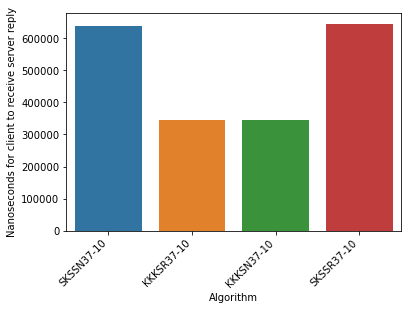

In [34]:
# Plot lat36rate10
axis = sns.barplot(x = 'Algorithm', y = 'client received server reply', data = lat37rate10)
axis.set(ylabel = 'Nanoseconds for client to receive server reply')
axis.set_xticklabels(labels = lat37rate10['Algorithm'], rotation=45, ha='right')

[Text(0, 0, 'SKSSN209-10'),
 Text(0, 0, 'KKKSR209-10'),
 Text(0, 0, 'KKKSN209-10'),
 Text(0, 0, 'SKSSR209-10')]

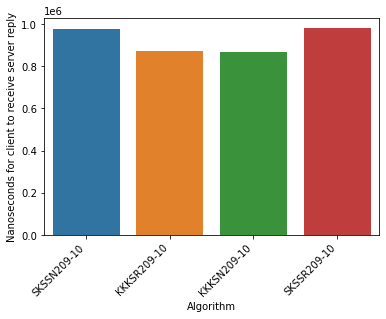

In [35]:
# Plot lat206rate10
axis = sns.barplot(x = 'Algorithm', y = 'client received server reply', data = lat209rate10)
axis.set(ylabel = 'Nanoseconds for client to receive server reply')
axis.set_xticklabels(labels = lat209rate10['Algorithm'], rotation=45, ha='right')

[Text(0, 0, 'SKSSN37-1000'),
 Text(0, 0, 'KKKSR37-1000'),
 Text(0, 0, 'KKKSN37-1000'),
 Text(0, 0, 'SKSSR37-1000')]

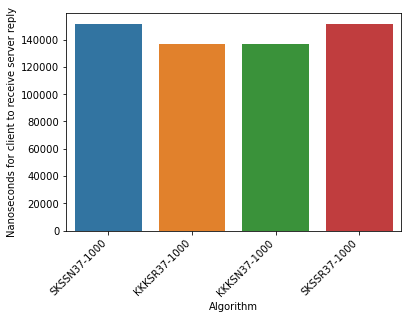

In [42]:
# Plot lat36rate1000
axis = sns.barplot(x = 'Algorithm', y = 'client received server reply', data = lat37rate1000)
axis.set(ylabel = 'Nanoseconds for client to receive server reply')
axis.set_xticklabels(labels = lat37rate1000['Algorithm'], rotation=45, ha='right')

[Text(0, 0, 'SKSSN209-1000'),
 Text(0, 0, 'KKKSR209-1000'),
 Text(0, 0, 'KKKSN209-1000'),
 Text(0, 0, 'SKSSR209-1000')]

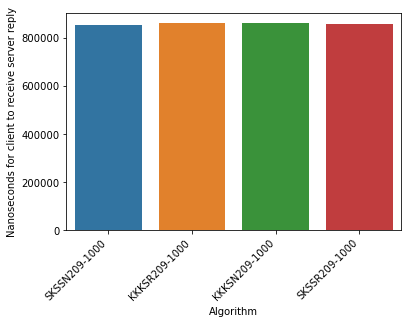

In [44]:
# Plot lat206rate1000
axis = sns.barplot(x = 'Algorithm', y = 'client received server reply', data = lat209rate1000)
axis.set(ylabel = 'Nanoseconds for client to receive server reply')
axis.set_xticklabels(labels = lat209rate1000['Algorithm'], rotation=45, ha='right')